# Task: The given dataset contains details about organic chemical compounds including their chemical features, isomeric conformation, names and the classes in which they are classified. The compounds are classified as either ‘Musk’ or ‘Non-Musk’ compounds. Your task is to build a classification model on the given data using any Deep Learning approach that you deem appropriate viz. Multi-Layer Perceptron, CNN, RNN, etc. or you could also use transfer learning approaches through selection of appropriate pre-trained model. The data has to be split in a 80:20 ratio for training and validation datasets. You can perform whatever preprocessing and post-processing operations on the data that may help you improve the performance of your model. You are required to report the performance measures of the model viz. Accuracy( Training and Validation) and Loss(Training and Validation) graphs, F1 score, precision, recall, etc. along with a well detailed report of what models, pre-processing, post-processing approaches you have used and why you chose to use these approaches.

import required libraries

In [65]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

read the Data

In [12]:
df=pd.read_csv("C:/Users/haiva/Downloads/musk_csv.csv")

checking information about data


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


checking for any null values in Data

In [14]:
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

seperating dependent and independent columns

In [15]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [16]:
X

array([[  46, -108,  -60, ...,  -50, -112,   96],
       [  41, -188, -145, ...,  -61, -136,   79],
       [  46, -194, -145, ...,  -67, -145,   39],
       ...,
       [  44, -102,  -19, ...,  -66, -144,   -6],
       [  51, -121,  -23, ...,  -44, -116,  117],
       [  51, -122,  -23, ...,  -44, -115,  118]], dtype=int64)

In [17]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# preprocessing the data

 Input Data is in diffrent scales we are using standardscaler to scale down the input data

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Split the Data for Training and testing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training model using Ann

In [47]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=(166,),
                          activation=tf.nn.sigmoid),    
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Compiling the ANN
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20,validation_data=(X_test,y_test))

Epoch 1/20
132/132 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8678 - val_loss: 0.2785 - val_accuracy: 0.9053
Epoch 2/20
132/132 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.9128 - val_loss: 0.2231 - val_accuracy: 0.9252
Epoch 3/20
132/132 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9256 - val_loss: 0.1998 - val_accuracy: 0.9375
Epoch 4/20
132/132 [==============================] - 0s 959us/step - loss: 0.1916 - accuracy: 0.9318 - val_loss: 0.1854 - val_accuracy: 0.9347
Epoch 5/20
132/132 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 0.9382 - val_loss: 0.1727 - val_accuracy: 0.9422
Epoch 6/20
132/132 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9460 - val_loss: 0.1587 - val_accuracy: 0.9460
Epoch 7/20
132/132 [==============================] - 0s 943us/step - loss: 0.1460 - accuracy: 0.9484 - val_loss: 0.1531 - val_accuracy: 0.9460
Ep

Plot the history of training Accuracy  and loss 

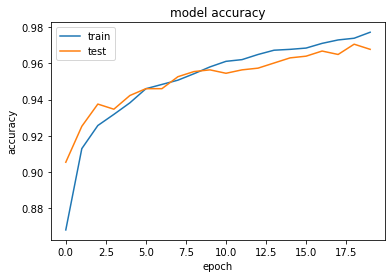

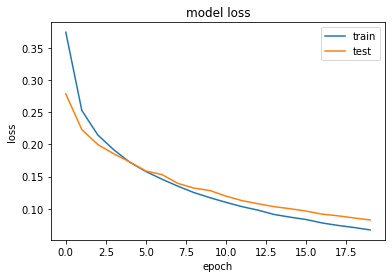

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('accuracy.png',dpi = 100)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('loss.png',dpi = 100)
plt.show()

Validation Accuracy and Validation loss

In [61]:
# Get Validation Accuracy, Validation Loss
print(history.history['val_accuracy'][-1] * 100)
print(history.history['val_loss'][-1])

96.78030014038086
0.08257365226745605


predicting model for test data

In [53]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[0.13536492 0.52224743 0.10446391 0.11901623 0.00339225 0.0057033
 0.00201687 0.54162246 0.03072503 0.00317228]
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]


Classification Report 

In [54]:

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1120
           1       0.93      0.85      0.89       200

    accuracy                           0.97      1320
   macro avg       0.95      0.92      0.94      1320
weighted avg       0.97      0.97      0.97      1320



print fi and recall score for test data

In [68]:
from sklearn.metrics import f1_score, precision_score, recall_score
print("f1_score:",f1_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("precission:", precision_score(y_test,y_pred))

f1_score: 0.8900523560209425
recall: 0.85
precission: 0.9340659340659341


Save the model

In [63]:
# Exporting model to .h5
model.save("musk_model.h5")

# to create model we have used Gred search  cv to find the parameters to get good accuracy
Input Layer - 166 Features

Hidden Layer - 30 Neurons (Activation Function - sigmoid)

Output Later - 1 Output Feature - Class Label (Activation Function - Sigmoid)

Optimizer - Adam

Loss - Binary Crossentropy

Epochs - 10

# Evalution of model
Validation Loss: 0.08

Validation Accuracy: 96.7%

F1-Score: 0.89

Precision: 0.93

Recall: 0.85